In [134]:
# general info on experiment: 

import glob
import numpy as np
import matplotlib.pyplot as plt

p_id = '4' # Participant ID
DataFolder = '/Users/atzovara/Documents/Python/AuditoryOddball/Data/'

exp_output = glob.glob(DataFolder + "Participant_" + str(p_id) + "*.npz")
Stimuli = np.load(exp_output[0])

Dev = Stimuli['Dev']
Sounds = Stimuli['Sounds']
Freq_Dev = Stimuli['Freq_Dev']

print("Participant "+ p_id + ": found " + str(Sounds.shape[0]) + " blocks, with " + str(Sounds.shape[1]) + " sounds each.")

for bl in range(Sounds.shape[0]):
    print("Block " + str(bl + 1) + ": Deviants were " + str(Freq_Dev[bl]) + " Hz and occured at trials: " + str(Dev[bl]))

Participant 4: found 2 blocks, with 50 sounds each.
Block 1: Deviants were 2000.0 Hz and occured at trials: [  4.   7.   9.  11.  14.  18.  24.  39.  43.  49.]
Block 2: Deviants were 500.0 Hz and occured at trials: [  5.   8.  12.  25.  31.  33.  36.  40.  43.  46.]


Block1 , ITI min: 594.0, ITI max: 597.0
Block2 , ITI min: 594.0, ITI max: 597.0


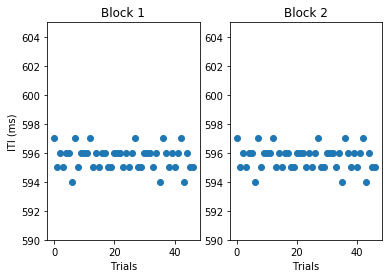

In [138]:
# Check ITI:

for bl in range(Sounds.shape[0]):
    exp_output = glob.glob(DataFolder + "Participant_" + str(p_id) + "_Block" + str(bl+1) + "*TIMING.npy")
    
    timing = np.load(exp_output[0])
    #the time when each sound occured:
    SoundOn = timing[1:timing.shape[0]-1,0]
    
    plt.subplot(1, 2, bl+1)
    plt.plot(np.diff(SoundOn), 'o')
    axes = plt.gca()
    axes.set_ylim([590,605])
    plt.xlabel("Trials")
    plt.title("Block " + str(bl+1))
    if bl == 0:
        plt.ylabel("ITI (ms)")
    
    print("Block" + str(bl+1) + " , ITI min: " + str(np.min(np.diff(SoundOn))) + ", ITI max: " + str(np.max(np.diff(SoundOn))))
    
    
    

Text(0.5,1,'Sound 2')

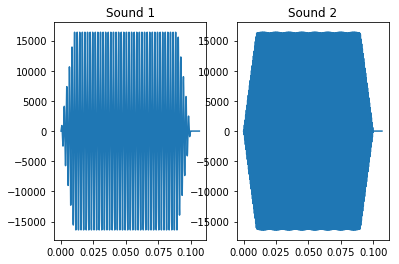

In [127]:
# Check stimuli:

Fs = 44100
dt = 1/Fs
duration = Sounds.shape[2] # in seconds
ts = np.cumsum(dt*np.ones(duration))
len(ts)
%matplotlib inline

plt.subplot(1, 2, 1)
plt.plot(ts, Sounds[0][0])
plt.title("Sound 1")

plt.subplot(1, 2, 2)
plt.plot(ts,Sounds[0][int(Dev[0][0])])
plt.title("Sound 2")
